<a href="https://colab.research.google.com/github/draddo11/FraudDetection/blob/main/FindingCorrelationBetweenTransactionAmount%26Fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
from google.colab import files

In [18]:
import matplotlib.pyplot as plt


In [7]:
uploaded = files.upload()


Saving card_transdata.csv to card_transdata.csv


In [8]:
data =pd.read_csv("card_transdata.csv")

In [9]:
data.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


In [10]:
data.tail()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
999995,2.207101,0.112651,1.626798,1.0,1.0,0.0,0.0,0.0
999996,19.872726,2.683904,2.778303,1.0,1.0,0.0,0.0,0.0
999997,2.914857,1.472687,0.218075,1.0,1.0,0.0,1.0,0.0
999998,4.258729,0.242023,0.475822,1.0,0.0,0.0,1.0,0.0
999999,58.108125,0.318110,0.386920,1.0,1.0,0.0,1.0,0.0


In [11]:
correlation_df = data[["ratio_to_median_purchase_price","fraud"]]

In [12]:
correlation = correlation_df["ratio_to_median_purchase_price"].corr(correlation_df["fraud"])
print(f"Correlation between transaction amount and fraud:{correlation}")


Correlation between transaction amount and fraud:0.4623047222882617


In [16]:
avgnonfraudtransaction = correlation_df[correlation_df["fraud"]==0]["ratio_to_median_purchase_price"].mean()
avgfraudtransaction = correlation_df[correlation_df["fraud"]==1]["ratio_to_median_purchase_price"].mean()
#avgfraudtransaction = correlation_df["fraud"]==1["ratio_to_median_purchase_price"].mean()
print(f"Average ratio to median purchase price for non fradulent transactions:{avgnonfraudtransaction}")
print(f"Average ratio to median purchaseprice for frudulent transactions:{avgfraudtransaction}")

Average ratio to median purchase price for non fradulent transactions:1.423641855458059
Average ratio to median purchaseprice for frudulent transactions:6.006323490486969


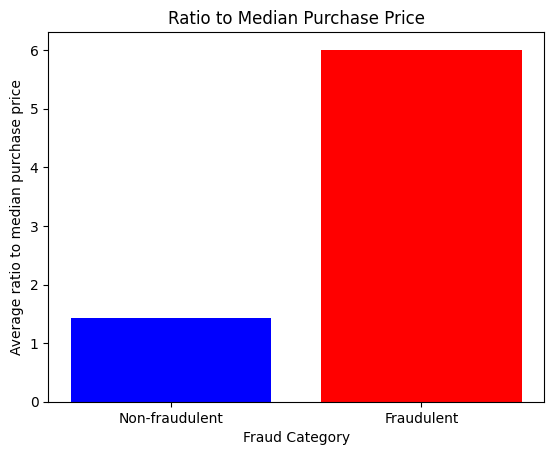

In [19]:
categories = ["Non-fraudulent", "Fraudulent"]
average_ratio = [avgnonfraudtransaction,avgfraudtransaction]
plt.bar(categories,average_ratio,color=['blue','red'])
plt.title("Ratio to Median Purchase Price")
plt.xlabel("Fraud Category")
plt.ylabel("Average ratio to median purchase price")
plt.show()